# **2023-2 비지니스머신러닝이론및실습**

Takehome exam (due date : 12월 21일까지)

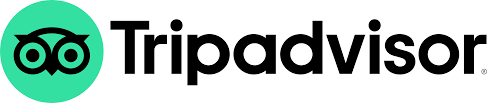

첨부된 파일은 로마시내의 호텔 목록이다. Tripadvisor를 통해 투숙객이 부여할 평점을 예측해 보시오. 또한 결과를 분석하여 나름의 business insight를 도출해 보시오.
- 결과의 재현을 위해 random_state는 123으로 고정한다.
- 각 feature의 사용 유무/feature engineering은 적절히 판단한다.
- test 데이터는 전체 데이터의 20%를 사용하여 평가한다.
- 아래 코드는 가이드 코드이므로 제출할 때에는 계산된 결과보다 정확한 결과가 도출되도록 노력한다.

이 과제는 Takehome exam이므로 **혼자서 프로젝트를 진행해야 한다**.
(아는 사람과 공유하면 그것 때문에 본인의 성적이 떨어질 수 있다.)

## Import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/HUFS 23-2/Business Machine Learning/data

/content/drive/MyDrive/HUFS 23-2/Business Machine Learning/data


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('final_project_hotelReview.csv',encoding='CP949')
data.head()

,Unnamed: 0,hotel_url,name,bubble_rating,category_hotel,category_inn,category_specialty,class,n_reviews,location_grade,...,amenities_Wardrobe / closet,amenities_Washing machine,amenities_Water park,amenities_Water park offsite,amenities_Waterslide,amenities_Waxing services,amenities_Whirlpool bathtub,amenities_Wifi,amenities_Wine / champagne,amenities_Yoga classes
0,1,https://www.tripadvisor.com/Hotel_Review-g1877...,Casa Mia in Trastevere,4.5,0,1,0,3,154,100.0,...,0,0,0,0,0,0,0,1,1,0
1,2,https://www.tripadvisor.com/Hotel_Review-g1877...,Hotel Artemide,5.0,1,0,0,4,8286,100.0,...,1,1,0,0,0,0,0,1,0,0
2,3,https://www.tripadvisor.com/Hotel_Review-g1877...,A.Roma Lifestyle Hotel,4.5,1,0,0,4,4389,51.0,...,0,0,0,0,0,0,0,1,0,0
3,4,https://www.tripadvisor.com/Hotel_Review-g1877...,iQ Hotel Roma,4.5,1,0,0,4,4987,100.0,...,1,1,0,0,0,0,0,1,1,0
4,5,https://www.tripadvisor.com/Hotel_Review-g1877...,The Guardian,4.5,1,0,0,3,1068,100.0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
print(data.shape)

(4599, 267)


In [ ]:
data.drop(['Unnamed: 0', 'hotel_url', 'name'], axis=1, inplace=True)

In [ ]:
# 호텔 등급 없는 것들은 모두 0으로 변환
idx = data['class'] == 'no stars'
data.loc[idx, 'class'] = 0

# missing value 포함한 feature 정보 출력
for i in data.columns:
    if data[i].isnull().sum() > 0:
        print(i, data[i].isnull().sum())

location_grade 218
price_curr_min 2224
price_min 1125
price_max 1127
photos 577


## Data pre-processing

### 결측치 처리: KNNImputer

In [ ]:
from sklearn.impute import KNNImputer

# 결측치가 있는 행과 없는 행 분리
missing_rows = data[data.isnull().any(axis=1)]
not_missing_rows = data.dropna()

# KNNImputer 초기화
imputer = KNNImputer(n_neighbors=5)  # n_neighbors는 이웃의 수를 지정하는 매개변수입니다.

# 'class' 열에서 'no stars'를 0으로 변환
idx = data['class'] == 'no stars'
data.loc[idx, 'class'] = 0

# Feature와 Target 변수 정의
X = data.drop('bubble_rating', axis=1)
y = data['bubble_rating']

# KNNImputer를 사용하여 결측치 채우기
data_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# 결측치를 채운 데이터에 target 변수 추가
data_imputed['bubble_rating'] = y

In [ ]:
# 확인
for i in data_imputed.columns:
    if data_imputed[i].isnull().sum() > 0:
        print(i, data[i].isnull().sum())

### 결측치 처리: SimpleImputer

In [ ]:
from sklearn.impute import SimpleImputer

# 결측치가 있는 행과 없는 행 분리
missing_rows = data[data.isnull().any(axis=1)]
not_missing_rows = data.dropna()

# SimpleImputer 초기화 (평균값 사용)
imputer = SimpleImputer(strategy='mean')

# 'class' 열에서 'no stars'를 0으로 변환
idx = data['class'] == 'no stars'
data.loc[idx, 'class'] = 0

# Feature와 Target 변수 정의
X = data.drop('bubble_rating', axis=1)
y = data['bubble_rating']

# SimpleImputer를 사용하여 결측치 채우기
data_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# 결측치를 채운 데이터에 target 변수 추가
data_imputed['bubble_rating'] = y

In [ ]:
# 확인
for i in data_imputed.columns:
    if data_imputed[i].isnull().sum() > 0:
        print(i, data[i].isnull().sum())

### 결측치 처리: drop

In [ ]:
# 'class' 열에서 'no stars'를 0으로 변환
idx = data['class'] == 'no stars'
data.loc[idx, 'class'] = 0

# 'class' 열의 데이터 타입을 숫자로 변환
data['class'] = pd.to_numeric(data['class'], errors='coerce')

# missing value 난건 모조리 drop
data_imputed = data.drop(['location_grade', 'price_curr_min', 'price_min', 'price_max', 'photos'], axis=1)


In [ ]:
data_imputed.shape

(4599, 259)

In [ ]:
# 확인
for i in data_imputed.columns:
    if data_imputed[i].isnull().sum() > 0:
        print(i, data[i].isnull().sum())

## Gradient Boost Regression No PCA ver.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Feature와 Target 변수 정의
X_imputed = data_imputed.drop('bubble_rating', axis=1)
y_imputed = data_imputed['bubble_rating']

# 데이터를 훈련 세트와 테스트 세트로 나눔
X_train_imputed, X_test_imputed, y_train_imputed, y_test_imputed = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=123)

# 파라미터 그리드 정의
param_grid = {
    'n_estimators': [100],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

# Gradient Boosting Regressor 초기화
gb_model = GradientBoostingRegressor(random_state=123)

# 그리드 서치 수행
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=2)
grid_search.fit(X_train_imputed, y_train_imputed)

# 최적의 파라미터 출력
print("Best Parameters:", grid_search.best_params_)

# 최적의 모델로 예측
y_train_pred_gb = grid_search.predict(X_train_imputed)
y_test_pred_gb = grid_search.predict(X_test_imputed)

# RMSE 계산
rmse_train_gb = np.sqrt(mean_squared_error(y_train_imputed, y_train_pred_gb))
rmse_test_gb = np.sqrt(mean_squared_error(y_test_imputed, y_test_pred_gb))

# R-squared 계산 및 출력
r2_train_gb = r2_score(y_train_imputed, y_train_pred_gb)
r2_test_gb = r2_score(y_test_imputed, y_test_pred_gb)

print('Gradient Boosting Results:')
print('RMSE train: ', rmse_train_gb)
print('RMSE test: ', rmse_test_gb)
print('R2 score train: ', r2_train_gb)
print('R2 score test: ', r2_test_gb)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   1.0s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   1.0s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   1.0s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   1.0s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   1.0s
[CV] END ..learning_rate=0.05, max_depth=5, n_estimators=100; total time=   1.5s
[CV] END ..learning_rate=0.05, max_depth=5, n_estimators=100; total time=   1.5s
[CV] END ..learning_rate=0.05, max_depth=5, n_estimators=100; total time=   2.1s
[CV] END ..learning_rate=0.05, max_depth=5, n_estimators=100; total time=   1.7s
[CV] END ..learning_rate=0.05, max_depth=5, n_estimators=100; total time=   1.5s
[CV] END ..learning_rate=0.05, max_depth=7, n_estimators=100; total time=   2.0s
[CV] END ..learning_rate=0.05, max_depth=7, n_est

## PCA

In [ ]:
from sklearn.decomposition import PCA

# Feature와 Target 변수 정의
X_imputed = data_imputed.drop('bubble_rating', axis=1)
y_imputed = data_imputed['bubble_rating']

# 주성분 수를 적절히 선택
pca = PCA().fit(X_imputed)  # X_imputed로 변경
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
desired_variance_ratio = 0.95  # 목표로 하는 누적 설명된 분산 비율

# 적절한 주성분 수 선택
num_components = np.argmax(cumulative_explained_variance >= desired_variance_ratio) + 1

# 선택된 주성분 수 출력
print("Selected Number of Components:", num_components)

# PCA 초기화
pca = PCA(n_components=num_components)  # 선택된 주성분 수로 변경

# PCA를 사용하여 데이터 변환
X_pca = pca.fit_transform(X_imputed)

# 새로운 데이터프레임 생성
data_pca = pd.DataFrame(X_pca, columns=[f'PCA{i}' for i in range(1, num_components + 1)])
data_pca['bubble_rating'] = y_imputed

# 결과 출력
print(data_pca.head())

Selected Number of Components: 1
          PCA1  bubble_rating
0   -18.380742            4.5
1  8113.587221            5.0
2  4216.672040            4.5
3  4814.583082            4.5
4   895.615203            4.5


## Gradient Boost Regression yes PCA ver.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Feature와 Target 변수 정의
X_pca = data_pca.drop('bubble_rating', axis=1)
y_pca = data_pca['bubble_rating']

# 데이터를 훈련 세트와 테스트 세트로 나눔
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.2, random_state=123)

# 파라미터 그리드 정의
param_grid = {
    'n_estimators': [100],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

# Gradient Boosting Regressor 초기화
gb_model = GradientBoostingRegressor(random_state=123)

# 그리드 서치 수행
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=2)
grid_search.fit(X_train_pca, y_train_pca)

# 최적의 파라미터 출력
print("Best Parameters:", grid_search.best_params_)

# 최적의 모델로 예측
y_train_pred_gb = grid_search.predict(X_train_pca)
y_test_pred_gb = grid_search.predict(X_test_pca)

# RMSE 계산
rmse_train_gb = np.sqrt(mean_squared_error(y_train_pca, y_train_pred_gb))
rmse_test_gb = np.sqrt(mean_squared_error(y_test_pca, y_test_pred_gb))

# R-squared 계산 및 출력
r2_train_gb = r2_score(y_train_pca, y_train_pred_gb)
r2_test_gb = r2_score(y_test_pca, y_test_pred_gb)

print('Gradient Boosting Results:')
print('RMSE train: ', rmse_train_gb)
print('RMSE test: ', rmse_test_gb)
print('R2 score train: ', r2_train_gb)
print('R2 score test: ', r2_test_gb)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=5, n_estimators=100; total time=   0.3s
[CV] END ..learning_rate=0.05, max_depth=5, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=5, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=5, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=5, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=7, n_estimators=100; total time=   0.3s
[CV] END ..learning_rate=0.05, max_depth=7, n_est